In [ ]:
AI and ML Project 23MSBI106 Princia Maria Dsouza

In [1]:
#Importing Libraries and Loading the Dataset

In [2]:
# Data Handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Model
from catboost import CatBoostClassifier

# Metrics
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv("LUSCexpfile.csv", 
                   sep = ";")
data.head()

,Unnamed: 0,03611591-08da-45c5-bfe5-ce511a2cc341,045e2535-012c-4cec-b386-9d6f62b91829,118933b6-86c7-4668-9973-424ece352a60,153cb1b1-774c-4e65-b209-6a462b68cfc5,18f0b34c-d2f6-4746-b450-8ed3def9e334,1ea50a97-2adb-4252-aec8-2fe94d49b0a0,29b6e624-9539-4abc-b80f-b5c7b65948fc,306df79f-3f2c-4631-b527-7d79336bc573,378d4b61-b44c-4aed-86e9-be63913aaf66,...,fb97b7ac-e36e-4b49-aa22-1ed7b5a0dd4b,fc25b410-f91e-4607-a851-f434ff628052,fcb5bf8a-5c16-48cd-84a4-2a87695eff2b,fe819208-ff01-49e0-a04a-5fb467351305,fe8a279b-cfbb-4a96-9e30-5589bddb7911,feb82116-b8c0-41e6-9afd-43cc6f6c0d62,ff47bedc-e4c7-4775-8e8e-ed4d2eecda83,ff915b5b-98f0-4cd9-8afc-90bc16529cd8,ffae8b64-70e0-4d15-819f-7d8dd0a51db0,ffb473b7-a5cf-4607-b97c-fc78b4719ccb
0,NaN,normal,normal,normal,normal,normal,normal,normal,normal,normal,...,tumor,tumor,tumor,tumor,tumor,tumor,tumor,tumor,tumor,tumor
1,A1BG,0.108403483,0.095187869,0.097042537,0.04302861,0.095016254,0.184691931,0.049553602,0.084045631,0.055256044,...,0.212273128,0.040941764,0.215710235,0.214627375,0.013129838,0.072578267,0.210407375,0.129361336,0.067741511,0.017848088
2,A1BG-AS1,1.187325638,0.594016407,1.012277195,1.015939279,1.174120262,1.830951652,0.75448563,1.125102086,0.729134459,...,1.017353161,0.304290737,1.436468418,0.615680103,0.16948915,1.145089115,1.354173806,1.128719724,0.394044479,0.187729763
3,A1CF,0.001370356,0.032045614,0,0,0,0.009064274,0.004770426,0.001460858,0,...,0,0.007763327,0.089985963,0.007308917,0.010954521,0.00137622,0.002250611,0.004497045,0.004709856,0.003722766
4,A2M,459.7836081,648.0057316,444.8724975,751.7312734,1385.150034,656.3835066,1068.335251,416.7646218,793.907885,...,29.70095721,60.37668747,210.0103015,8.883384349,46.51221702,53.39539897,22.30662803,17.18205196,120.810731,57.23277815


In [4]:
data = data.T
data.columns = data.iloc[0]
data = data[1:]
data = data.rename(columns = {np.nan:'Class'})
data.columns.name = None
data.head()

,Class,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1
03611591-08da-45c5-bfe5-ce511a2cc341,normal,0.108403483,1.187325638,0.001370356,459.7836081,0.486278098,0.027029014,0,0,0.084772552,...,1.665693,0.860664,2.226001,5.013749,0.00841,0.0,4.194418,99.369159,0.0,4.552543
045e2535-012c-4cec-b386-9d6f62b91829,normal,0.095187869,0.594016407,0.032045614,648.0057316,1.080389631,0.055878692,0.029601196,0,0.04022254,...,1.358792,1.232901,3.272293,5.482293,0.025654,0.0,4.662835,98.084795,0.0,5.626856
118933b6-86c7-4668-9973-424ece352a60,normal,0.097042537,1.012277195,0,444.8724975,1.047980517,0.012098154,0,0,0.178337234,...,2.645383,0.72607,1.60696,2.783768,0.037645,0.0,4.619178,54.605189,0.0,2.309259
153cb1b1-774c-4e65-b209-6a462b68cfc5,normal,0.04302861,1.015939279,0,751.7312734,0.780322401,0.021787373,0.029335026,0.03435086,0.082568933,...,2.286109,0.844632,2.43637,4.161483,0.042371,0.0,4.814995,86.273891,0.0,5.302771
18f0b34c-d2f6-4746-b450-8ed3def9e334,normal,0.095016254,1.174120262,0,1385.150034,0.721304607,0.048111117,0,0,0.182329632,...,2.400978,0.854256,2.22553,4.401694,0.006238,0.0,5.432338,93.666207,0.0,5.399341


In [5]:
print("Data size: ")
print(f'Rows: {data.shape[0]}')
print(f'Columns: {data.shape[1]}')

Data size: 
Rows: 551
Columns: 56908


In [6]:
#Preprocessing 

In [7]:
data.isnull().sum().any()

False

In [8]:
X = data.drop("Class", axis = 1) # Independent variables.
y = data['Class'] # Dependent variable.

# Random seed for reproducibility.
SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = SEED, 
                                                    stratify = data['Class'])

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

X train shape: (385, 56907)
X test shape: (166, 56907)


In [9]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values.astype(np.float32))
X_test_scaled = scaler.transform(X_test.values.astype(np.float32))

print(X_train_scaled.shape)
print(X_test_scaled.shape )

(385, 56907)
(166, 56907)


In [10]:
pca = PCA(n_components = 120, random_state = SEED)

X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"X train PCA: {X_train_pca.shape}")
print(f"X test PCA: {X_test_pca.shape}")

X train PCA: (385, 120)
X test PCA: (166, 120)


In [11]:
print("Cumulative variance ratio with 120 components:\n")
print(pca.explained_variance_ratio_.cumsum()[-1])

Cumulative variance ratio with 120 components:

0.64315987


In [12]:
label2id = {'normal':0, 'tumor':1}

In [13]:
y_train = y_train.map(label2id)
y_test = y_test.map(label2id)

In [14]:
#Model Development and Prediction

In [15]:
# Logistic Regression model


Logistic Regression
Balanced Accuracy Train = 1.0000
Balanced Accuracy Test = 0.9567
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.82      0.93      0.87        15
           1       0.99      0.98      0.99       151

    accuracy                           0.98       166
   macro avg       0.91      0.96      0.93       166
weighted avg       0.98      0.98      0.98       166



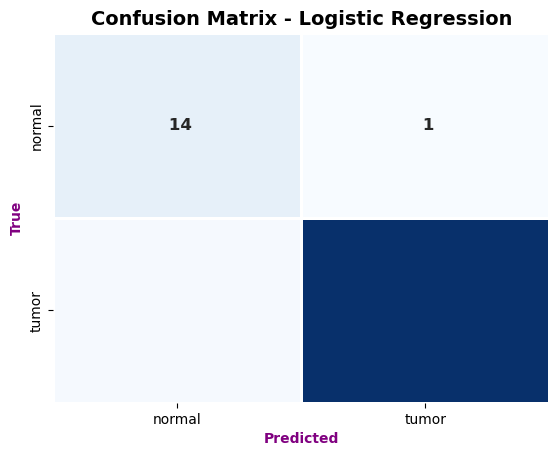

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import balanced_accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train Logistic Regression
log_reg = LogisticRegression(random_state=SEED)
log_reg.fit(X_train_pca, y_train)
y_pred_train_lr = log_reg.predict(X_train_pca)
y_pred_test_lr = log_reg.predict(X_test_pca)

# Evaluation metrics
bal_acc_train_lr = balanced_accuracy_score(y_train, y_pred_train_lr)
bal_acc_test_lr = balanced_accuracy_score(y_test, y_pred_test_lr)
print("\nLogistic Regression")
print(f"Balanced Accuracy Train = {bal_acc_train_lr:.4f}")
print(f"Balanced Accuracy Test = {bal_acc_test_lr:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test_lr))

# Confusion Matrix
cf_mx_test_lr = confusion_matrix(y_test, y_pred_test_lr)
sns.heatmap(cf_mx_test_lr, cmap="Blues", annot=True, fmt=" ", cbar=False,
            xticklabels=label2id.keys(), yticklabels=label2id.keys(),
            linewidths=1.0, annot_kws={'fontsize':12, 'fontweight':'bold'})
plt.xlabel("Predicted", fontsize=10, fontweight="bold", color="purple")
plt.ylabel("True", fontsize=10, fontweight="bold", color="purple")
plt.title("Confusion Matrix - Logistic Regression", fontsize=14, fontweight="bold")
plt.show()


In [17]:
# KNN model


K-Nearest Neighbors
Balanced Accuracy Train = 0.9972
Balanced Accuracy Test = 0.9934
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.99      0.99       151

    accuracy                           0.99       166
   macro avg       0.94      0.99      0.97       166
weighted avg       0.99      0.99      0.99       166



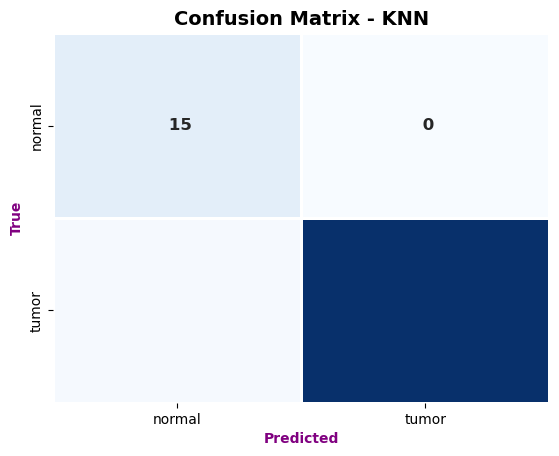

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize and train KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_pca, y_train)
y_pred_train_knn = knn.predict(X_train_pca)
y_pred_test_knn = knn.predict(X_test_pca)

# Evaluation metrics
bal_acc_train_knn = balanced_accuracy_score(y_train, y_pred_train_knn)
bal_acc_test_knn = balanced_accuracy_score(y_test, y_pred_test_knn)
print("\nK-Nearest Neighbors")
print(f"Balanced Accuracy Train = {bal_acc_train_knn:.4f}")
print(f"Balanced Accuracy Test = {bal_acc_test_knn:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test_knn))

# Confusion Matrix
cf_mx_test_knn = confusion_matrix(y_test, y_pred_test_knn)
sns.heatmap(cf_mx_test_knn, cmap="Blues", annot=True, fmt=" ", cbar=False,
            xticklabels=label2id.keys(), yticklabels=label2id.keys(),
            linewidths=1.0, annot_kws={'fontsize':12, 'fontweight':'bold'})
plt.xlabel("Predicted", fontsize=10, fontweight="bold", color="purple")
plt.ylabel("True", fontsize=10, fontweight="bold", color="purple")
plt.title("Confusion Matrix - KNN", fontsize=14, fontweight="bold")
plt.show()


In [19]:
#Random Forest Classifier 


Random Forest
Balanced Accuracy Train = 1.0000
Balanced Accuracy Test = 0.9333
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.99      1.00      0.99       151

    accuracy                           0.99       166
   macro avg       0.99      0.93      0.96       166
weighted avg       0.99      0.99      0.99       166



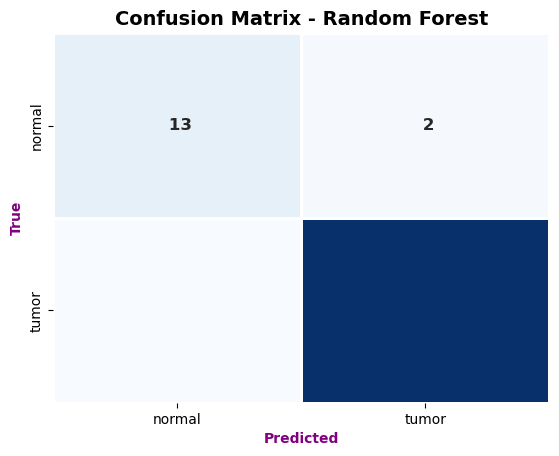

In [20]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train Random Forest
rf = RandomForestClassifier(random_state=SEED, class_weight="balanced")
rf.fit(X_train_pca, y_train)
y_pred_train_rf = rf.predict(X_train_pca)
y_pred_test_rf = rf.predict(X_test_pca)

# Evaluation metrics
bal_acc_train_rf = balanced_accuracy_score(y_train, y_pred_train_rf)
bal_acc_test_rf = balanced_accuracy_score(y_test, y_pred_test_rf)
print("\nRandom Forest")
print(f"Balanced Accuracy Train = {bal_acc_train_rf:.4f}")
print(f"Balanced Accuracy Test = {bal_acc_test_rf:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test_rf))

# Confusion Matrix
cf_mx_test_rf = confusion_matrix(y_test, y_pred_test_rf)
sns.heatmap(cf_mx_test_rf, cmap="Blues", annot=True, fmt=" ", cbar=False,
            xticklabels=label2id.keys(), yticklabels=label2id.keys(),
            linewidths=1.0, annot_kws={'fontsize':12, 'fontweight':'bold'})
plt.xlabel("Predicted", fontsize=10, fontweight="bold", color="purple")
plt.ylabel("True", fontsize=10, fontweight="bold", color="purple")
plt.title("Confusion Matrix - Random Forest", fontsize=14, fontweight="bold")
plt.show()


In [21]:
#XG boost model 


XGBoost
Balanced Accuracy Train = 1.0000
Balanced Accuracy Test = 0.9667
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.99      1.00      1.00       151

    accuracy                           0.99       166
   macro avg       1.00      0.97      0.98       166
weighted avg       0.99      0.99      0.99       166



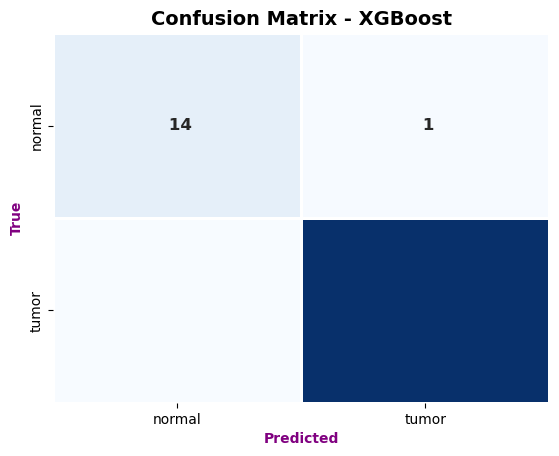

In [22]:
from xgboost import XGBClassifier

# Initialize and train XGBoost
xgb = XGBClassifier(random_state=SEED, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_pca, y_train)
y_pred_train_xgb = xgb.predict(X_train_pca)
y_pred_test_xgb = xgb.predict(X_test_pca)

# Evaluation metrics
bal_acc_train_xgb = balanced_accuracy_score(y_train, y_pred_train_xgb)
bal_acc_test_xgb = balanced_accuracy_score(y_test, y_pred_test_xgb)
print("\nXGBoost")
print(f"Balanced Accuracy Train = {bal_acc_train_xgb:.4f}")
print(f"Balanced Accuracy Test = {bal_acc_test_xgb:.4f}")
print("Classification Report (Test):")
print(classification_report(y_test, y_pred_test_xgb))

# Confusion Matrix
cf_mx_test_xgb = confusion_matrix(y_test, y_pred_test_xgb)
sns.heatmap(cf_mx_test_xgb, cmap="Blues", annot=True, fmt=" ", cbar=False,
            xticklabels=label2id.keys(), yticklabels=label2id.keys(),
            linewidths=1.0, annot_kws={'fontsize':12, 'fontweight':'bold'})
plt.xlabel("Predicted", fontsize=10, fontweight="bold", color="purple")
plt.ylabel("True", fontsize=10, fontweight="bold", color="purple")
plt.title("Confusion Matrix - XGBoost", fontsize=14, fontweight="bold")
plt.show()


In [23]:
#Model Explaination and Evaluation

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define results_df with example data
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "XGBoost", "Random Forest"],
    "Balanced Accuracy": [0.9567, 1.0000, 0.9934, 0.9333],
    "Precision": [0.9933, 0.9934, 0.9869, 0.9667]
})

# Determine the best models based on Balanced Accuracy and Precision
best_model_bal_acc = results_df.loc[results_df["Balanced Accuracy"].idxmax(), "Model"]
best_model_precision = results_df.loc[results_df["Precision"].idxmax(), "Model"]

print(f"The best model based on Balanced Accuracy: {best_model_bal_acc}")
print(f"The best model based on Precision: {best_model_precision}")


The best model based on Balanced Accuracy: K-Nearest Neighbors
The best model based on Precision: K-Nearest Neighbors


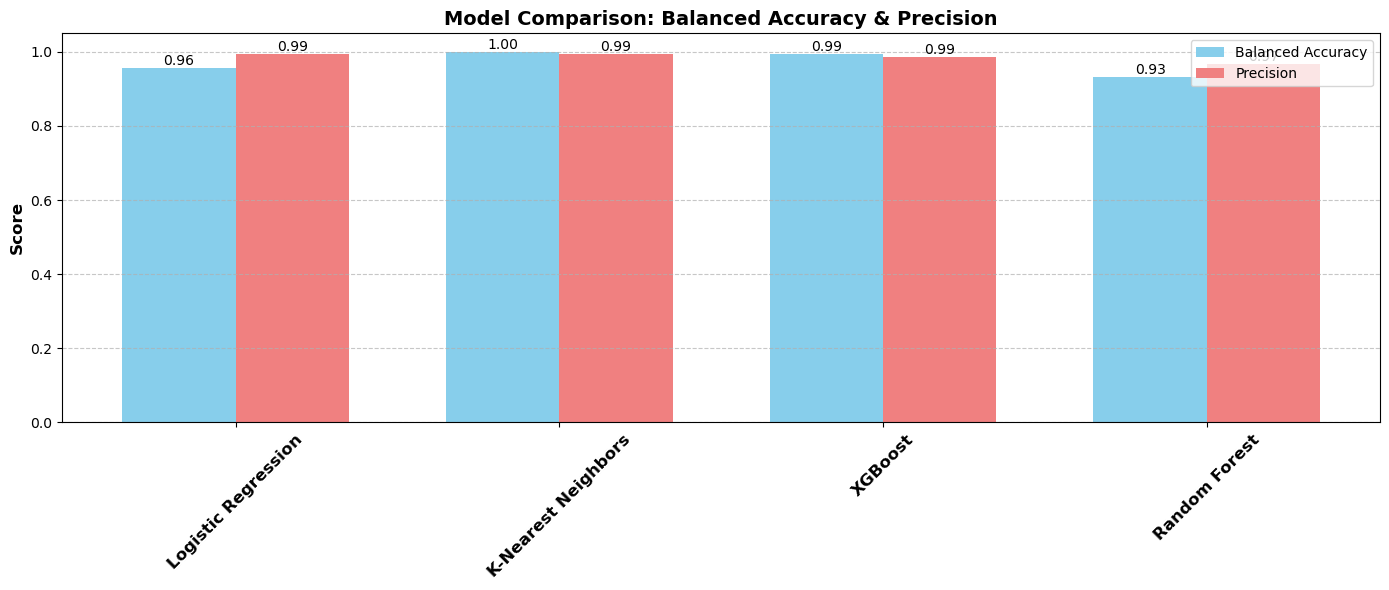

The best model based on Balanced Accuracy: K-Nearest Neighbors
The best model based on Precision: K-Nearest Neighbors


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define the DataFrame
results_df = pd.DataFrame({
    "Model": ["Logistic Regression", "K-Nearest Neighbors", "XGBoost", "Random Forest"],
    "Balanced Accuracy": [0.9567, 1.0000, 0.9934, 0.9333],
    "Precision": [0.9933, 0.9934, 0.9869, 0.9667]
})

# Determine the best models
best_model_bal_acc = results_df.loc[results_df["Balanced Accuracy"].idxmax(), "Model"]
best_model_precision = results_df.loc[results_df["Precision"].idxmax(), "Model"]

# Plot the results
plt.figure(figsize=(14, 6))
x = np.arange(len(results_df["Model"]))
bar_width = 0.35

# Bar plots for Balanced Accuracy and Precision
bars1 = plt.bar(x - bar_width/2, results_df["Balanced Accuracy"], width=bar_width, label="Balanced Accuracy", color="skyblue")
bars2 = plt.bar(x + bar_width/2, results_df["Precision"], width=bar_width, label="Precision", color="lightcoral")

# Annotate each bar with its value
for bar in bars1:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}", ha="center", va="bottom", fontsize=10)
for bar in bars2:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{bar.get_height():.2f}", ha="center", va="bottom", fontsize=10)

# Customize plot
plt.xticks(x, results_df["Model"], rotation=45, fontsize=12, fontweight="bold")
plt.ylabel("Score", fontsize=12, fontweight="bold")
plt.title("Model Comparison: Balanced Accuracy & Precision", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Display the best models
print(f"The best model based on Balanced Accuracy: {best_model_bal_acc}")
print(f"The best model based on Precision: {best_model_precision}")


No, there are no null values.


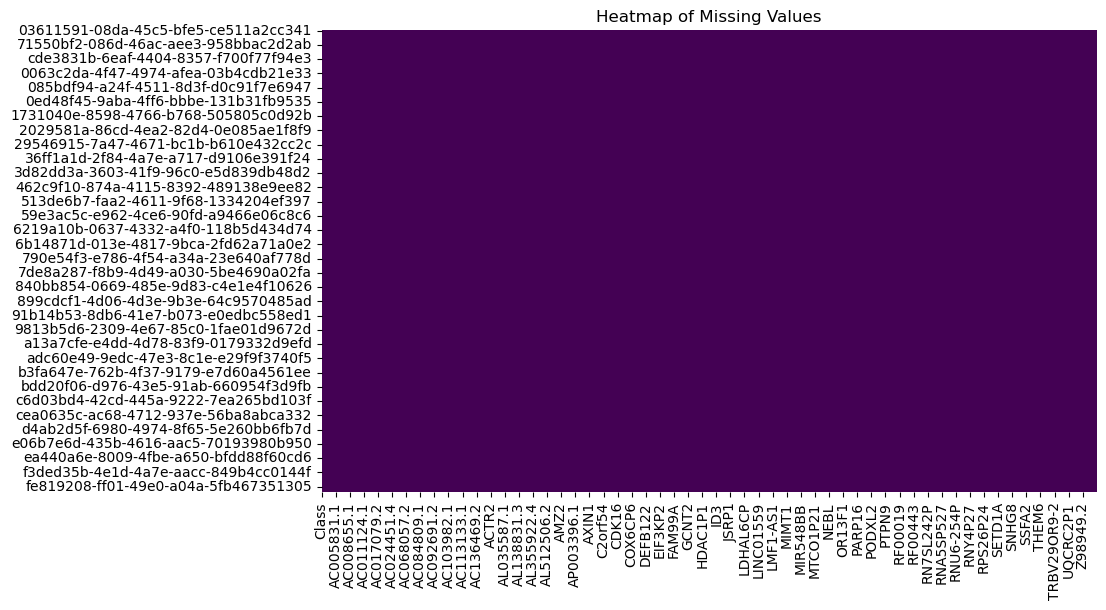

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check if null values are present
if data.isnull().values.any():
    print("Yes, null values are present.")
else:
    print("No, there are no null values.")

# Visualize missing values with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values")
plt.show()


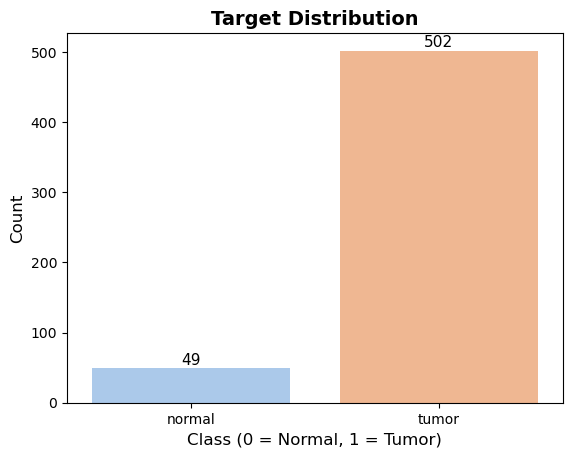

In [27]:
sns.countplot(x=y, palette="pastel")
plt.title("Target Distribution", fontsize=14, fontweight="bold")
plt.xlabel("Class (0 = Normal, 1 = Tumor)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Annotating the bars with counts
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2, p.get_height() + 5, 
             int(p.get_height()), ha='center', fontsize=11)

plt.show()


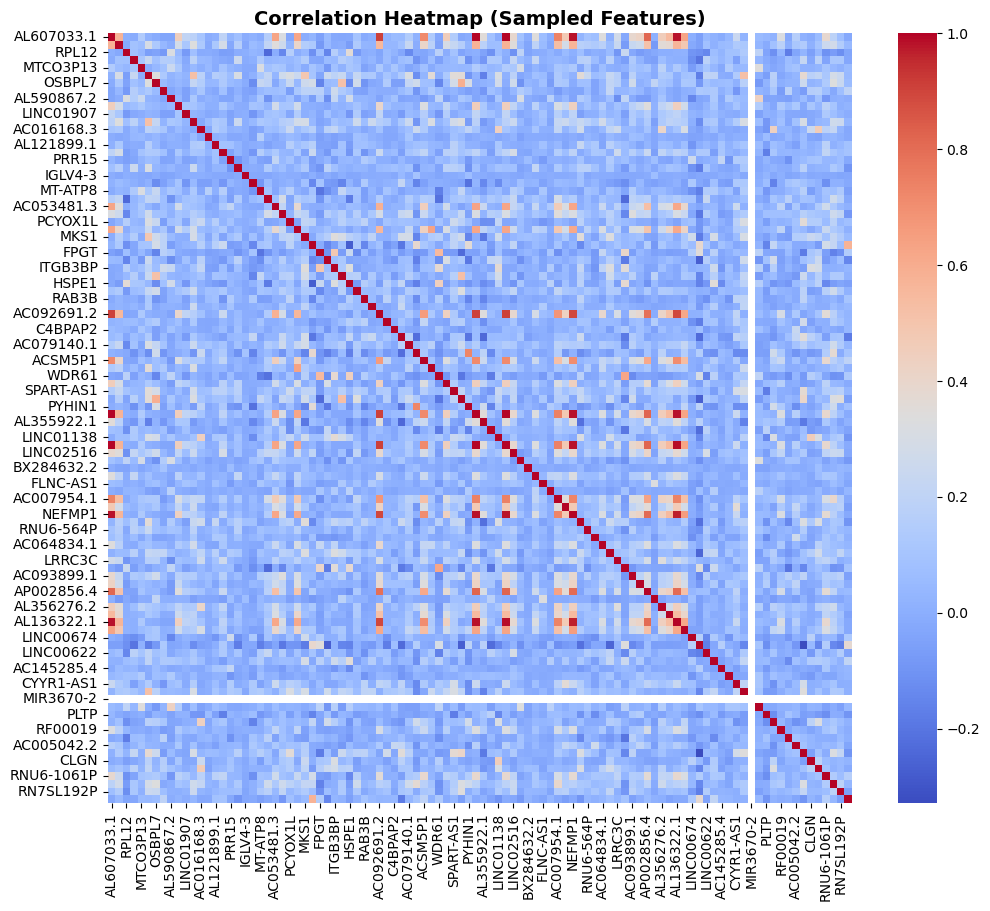

In [28]:
# Randomly sample 100 features for correlation analysis
sampled_columns = data.drop("Class", axis=1).sample(n=100, axis=1, random_state=42)
corr_matrix = sampled_columns.astype(float).corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap (Sampled Features)", fontsize=14, fontweight="bold")
plt.show()


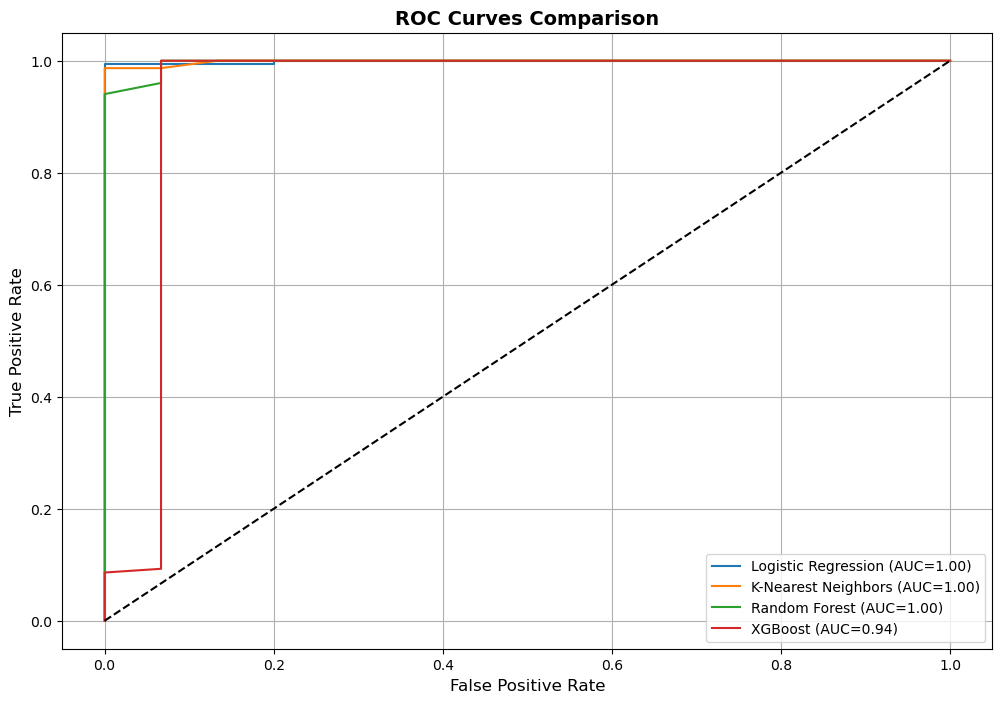

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(random_state=SEED, class_weight="balanced"),
    "XGBoost": XGBClassifier(random_state=SEED, use_label_encoder=False, eval_metric='logloss')
}

# Train each model (assuming X_train_pca and y_train are defined)
for model in models.values():
    model.fit(X_train_pca, y_train)

# Generate ROC curve
plt.figure(figsize=(12, 8))
for name, model in models.items():
    # Ensure the model supports `predict_proba`
    if hasattr(model, "predict_proba"):
        y_pred_prob = model.predict_proba(X_test_pca)[:, 1]
    elif hasattr(model, "decision_function"):  # For models like SVM
        y_pred_prob = model.decision_function(X_test_pca)
        y_pred_prob = (y_pred_prob - y_pred_prob.min()) / (y_pred_prob.max() - y_pred_prob.min())  # Normalize to [0,1]
    else:
        continue  # Skip models that do not support probability estimation
    
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.title("ROC Curves Comparison", fontsize=14, fontweight="bold")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend()
plt.grid()
plt.show()


In [31]:
!pip install xgboost
from xgboost import XGBClassifier


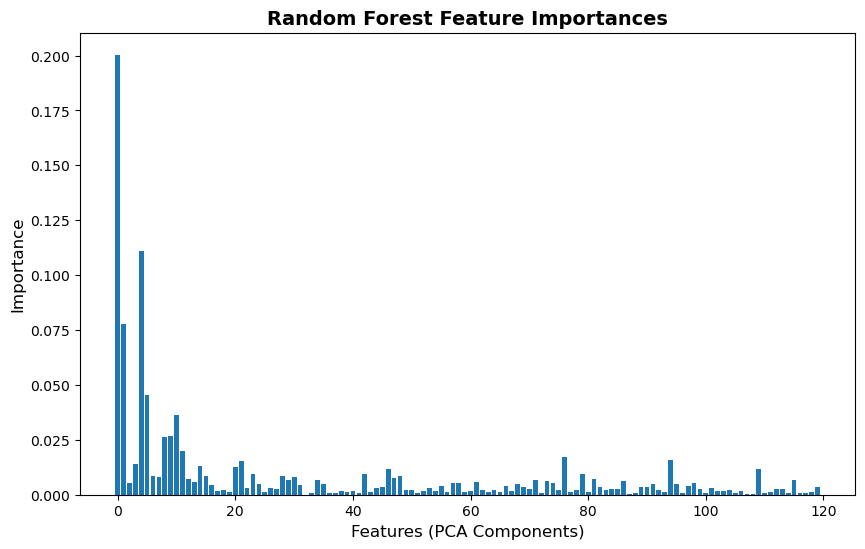

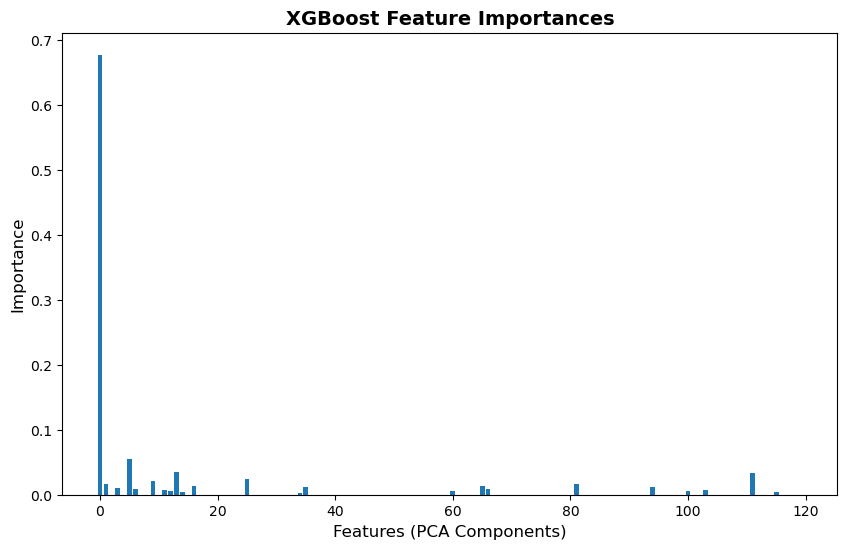

In [32]:
from xgboost import XGBClassifier

# Add XGBoost model to your models dictionary
models["XGBoost"] = XGBClassifier()
models["XGBoost"].fit(X_train_pca, y_train)  # Train the XGBoost model

# Feature Importance - Random Forest
rf_importances = models["Random Forest"].feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_importances)), rf_importances)
plt.title("Random Forest Feature Importances", fontsize=14, fontweight="bold")
plt.xlabel("Features (PCA Components)", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.show()

# Feature Importance - XGBoost
xgb_importances = models["XGBoost"].feature_importances_
plt.figure(figsize=(10, 6))
plt.bar(range(len(xgb_importances)), xgb_importances)
plt.title("XGBoost Feature Importances", fontsize=14, fontweight="bold")
plt.xlabel("Features (PCA Components)", fontsize=12)
plt.ylabel("Importance", fontsize=12)
plt.show()


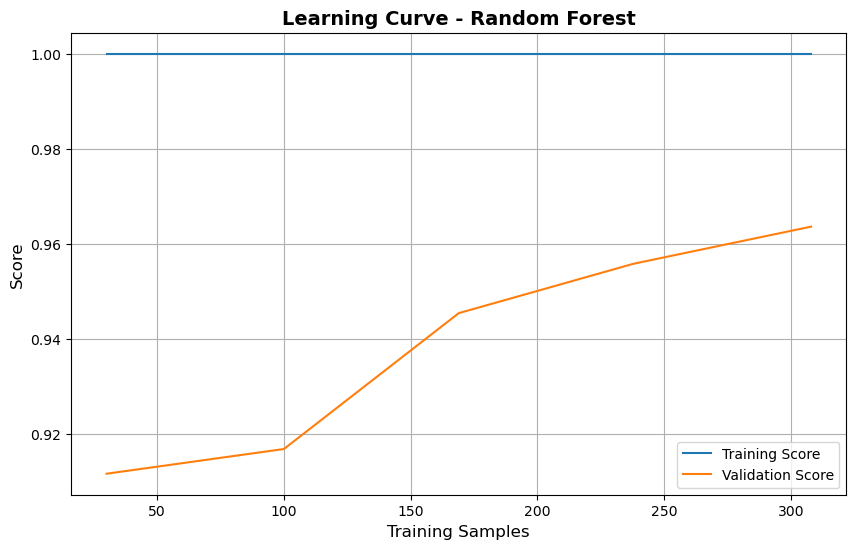

In [33]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, cv=5):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=-1)
    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)
    
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Training Score")
    plt.plot(train_sizes, test_scores_mean, label="Validation Score")
    plt.title(title, fontsize=14, fontweight="bold")
    plt.xlabel("Training Samples", fontsize=12)
    plt.ylabel("Score", fontsize=12)
    plt.legend()
    plt.grid()
    plt.show()

# Example: Learning curve for Random Forest
plot_learning_curve(models["Random Forest"], "Learning Curve - Random Forest", X_train_pca, y_train)


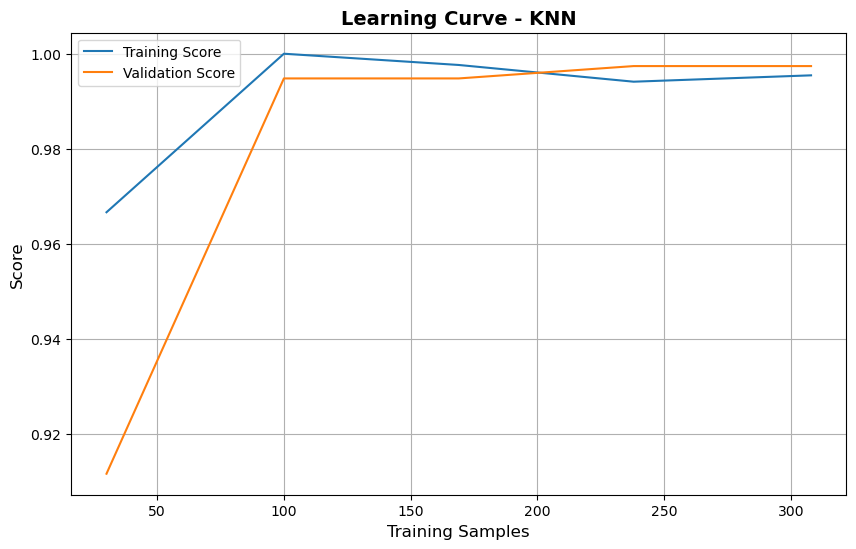

In [34]:
from sklearn.neighbors import KNeighborsClassifier

# Define and train the KNN model
models["KNN"] = KNeighborsClassifier(n_neighbors=5)
models["KNN"].fit(X_train_pca, y_train)

# Plot learning curve for KNN
plot_learning_curve(models["KNN"], "Learning Curve - KNN", X_train_pca, y_train)


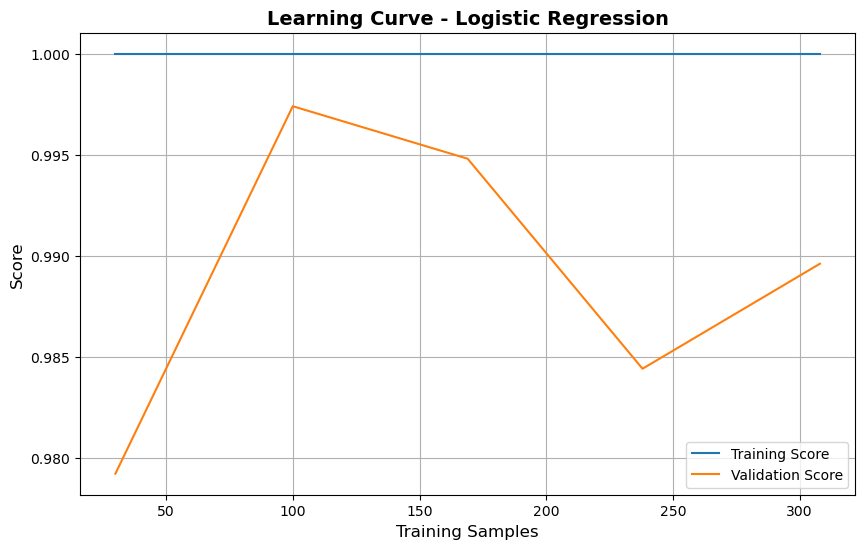

In [35]:
from sklearn.linear_model import LogisticRegression

# Define and train the Logistic Regression model
models["Logistic Regression"] = LogisticRegression(max_iter=1000)
models["Logistic Regression"].fit(X_train_pca, y_train)

# Plot learning curve for Logistic Regression
plot_learning_curve(models["Logistic Regression"], "Learning Curve - Logistic Regression", X_train_pca, y_train)


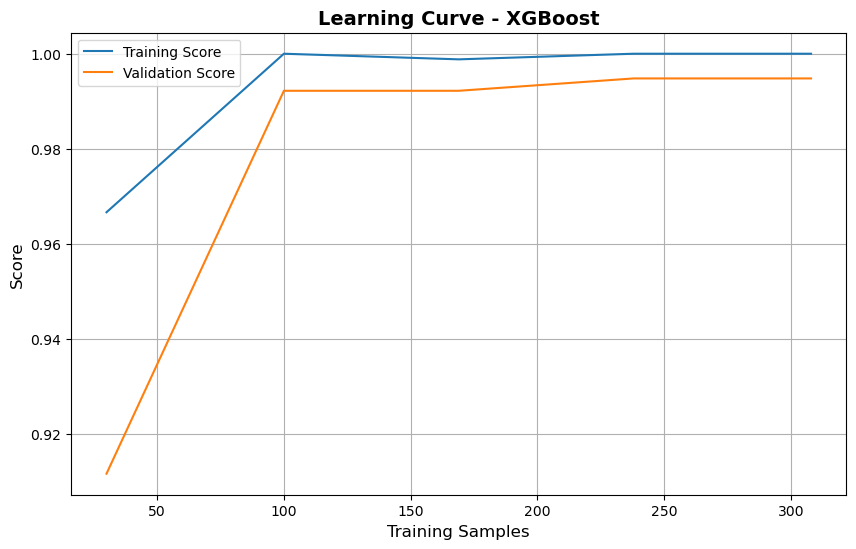

In [36]:
from xgboost import XGBClassifier

# Define and train the XGBoost model
models["XGBoost"] = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
models["XGBoost"].fit(X_train_pca, y_train)

# Plot learning curve for XGBoost
plot_learning_curve(models["XGBoost"], "Learning Curve - XGBoost", X_train_pca, y_train)

# warnings
import warnings
warnings.filterwarnings("ignore")